In [1]:
#Homework 1
#STAT 4100
#Phaedra Maurice

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
#Question 3b

#define f(u)
def f(u):
    return u**4 / (1 + u**6)

#area under curve estimator
def estimate_E(N, rng):
    X = rng.random(N) #sample x coordinates
    Y = rng.random(N) #sample y coordinates
    return np.mean(Y <= f(X)) #calculate & return fraction of points below the curve


In [3]:
#create a reference line for the integration
#here im using the 'quad' function from scipy.integrate, which uses Gaussian quadrature to estimate the integral 
reference, err = quad(f, 0, 1)

In [4]:
#build the list of N values
xs = np.round(np.arange(1.0, 5.0 + 1e-9, 0.1), 1) #creates the x values, ensuring one decimal place + even spacing
Ns = np.floor(10**xs).astype(int) #creates an array of sample sizes, rounding down and with whole numbers

In [5]:
#compute E(N) for each N
rng = np.random.default_rng(777) #random number generator
es = np.array([estimate_E(N, rng) for N in Ns]) #creates an array of each estimate

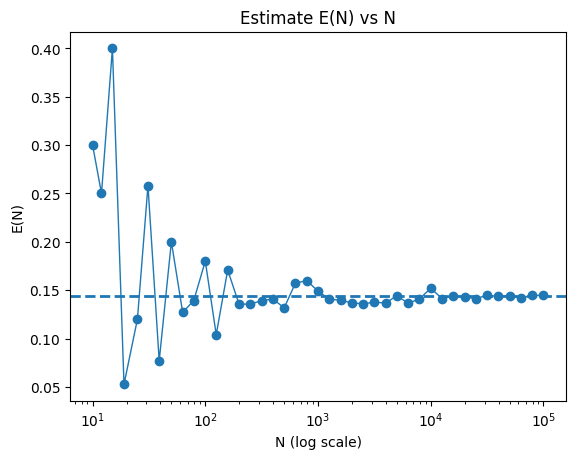

Reference integral: 0.1434257774478257


In [6]:
#plot
plt.figure()
plt.plot(Ns, es, marker="o", linewidth=1)
plt.axhline(reference, linestyle="--", linewidth=2) 
plt.xscale("log")
plt.xlabel("N (log scale)")
plt.ylabel("E(N)")
plt.title("Estimate E(N) vs N")
plt.show()

print("Reference integral:", reference)

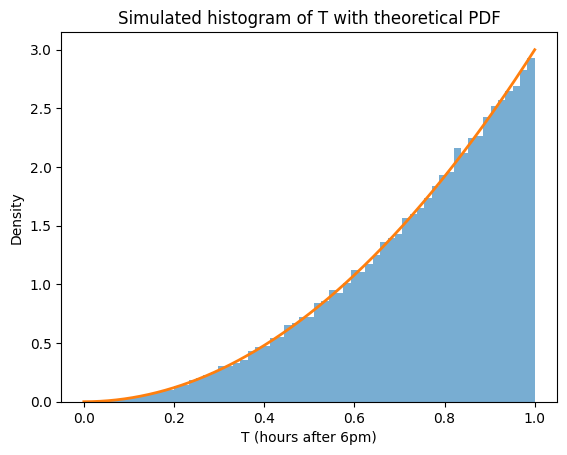

In [7]:
# Question 4b

N = 10**5 #number of trials
rng = np.random.default_rng(777) #random number generator

#simulate arrivals in hours after 6pm
arrivals = rng.random((N, 3))

#calculate T
T = arrivals.max(axis=1)

#create histogram
plt.figure()
plt.hist(T, bins=60, density=True, alpha=0.6, edgecolor="none")

#add theoretical PDF line
t = np.linspace(0, 1, 500)

#theoretical PDF
fT = 3 * t**2

#plot
plt.plot(t, fT, linewidth=2)

plt.xlabel("T (hours after 6pm)")
plt.ylabel("Density")
plt.title("Simulated histogram of T with theoretical PDF")
plt.show()